In [2]:
# import packages
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from PIL import Image
from pandas import read_csv

# from lmfit import Model, fit_report
# from lmfit.models import LinearModel
from scipy.signal import argrelextrema

In [11]:
h2_vprf = fits.open('sh2_vprf.fits', ignore_missing_end=True)[0].data
h3p_vprf = fits.open('sh3p_vprf.fits', ignore_missing_end=True)[0].data
h2_verr = fits.open('sh2_verr.fits', ignore_missing_end=True)[0].data
h3p_verr = fits.open('sh3p_verr.fits', ignore_missing_end=True)[0].data
h2_int = fits.open('sh2_int_shifted.fits', ignore_missing_end=True)[0].data
h3p_int = fits.open('sh3p_int_shifted.fits', ignore_missing_end=True)[0].data

h2_vprf[h2_verr > 4] = np.nan
h3p_vprf[h3p_verr > 4] = np.nan

h2_vprf[h2_vprf > 4] = np.nan
h3p_vprf[h3p_vprf > 4] = np.nan
h2_vprf[h2_vprf < -4] = np.nan
h3p_vprf[h3p_vprf < -4] = np.nan

h2_vprf[:,:20] = np.nan
h3p_vprf[:,:20] = np.nan
h2_vprf[:,280:] = np.nan
h3p_vprf[:,280:] = np.nan

h2_verr[np.isnan(h2_vprf)] = np.nan
h3p_verr[np.isnan(h3p_vprf)] = np.nan
h2_int[np.isnan(h2_vprf)] = np.nan
h3p_int[np.isnan(h3p_vprf)] = np.nan

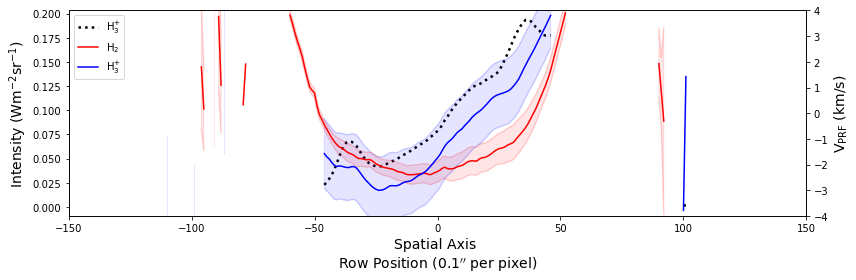

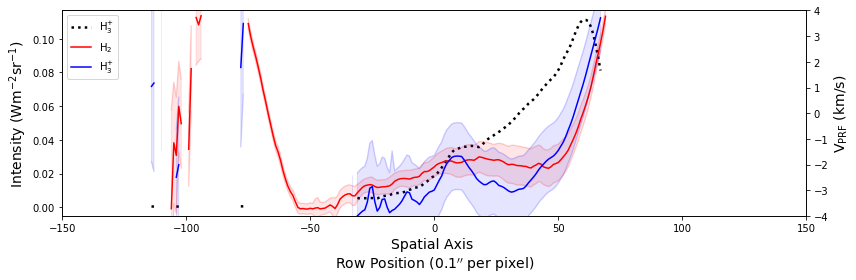

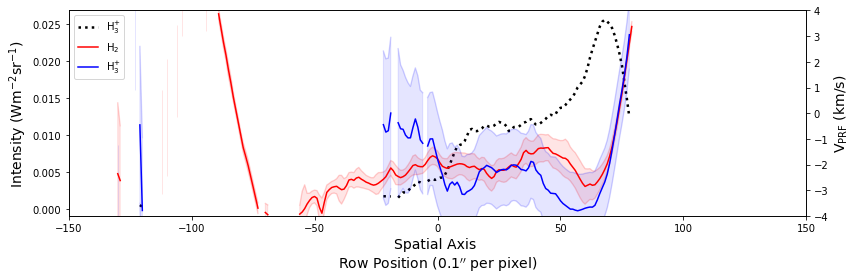

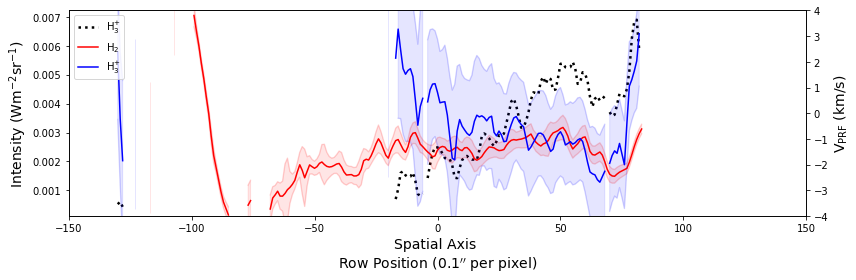

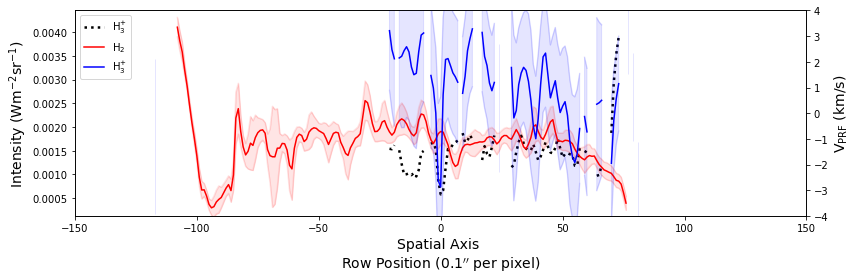

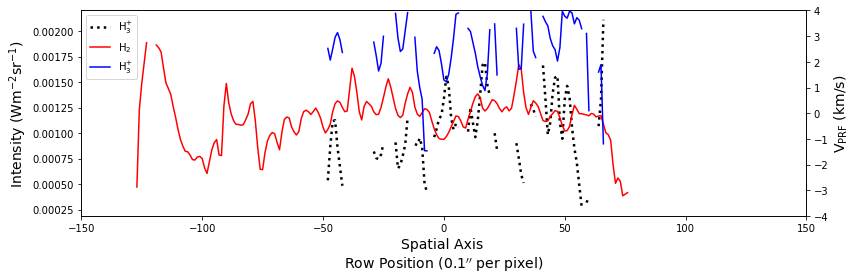

In [14]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(-150,150,301)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

a2 = h2_vprf*(-1)
b2 = h3p_vprf*(-1)

for i in range(len(h3p_vprf)):
# for i in range(18, 19):
    if i not in (0,15,16,37):  
        xnew = np.linspace(-150,150,301)
#         int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
#         plt.title('CML = '+ str(cml[i]), fontsize=14)
        
        vh2 = a2[i]
        vh2max = a2[i] + h2_verr[i]
        vh2min = a2[i] - h2_verr[i]
        
        vh3p = b2[i]
        vh3pmax = b2[i] + h3p_verr[i]
        vh3pmin = b2[i] - h3p_verr[i]
        
        ax2 = ax.twinx()
        
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
#         ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
        
        ax2.plot(xnew, vh2, color='red', label='H$_2$')        
        ax2.plot(xnew, vh2max, color='red', alpha=0.1)
        ax2.plot(xnew, vh2min, color='red', alpha=0.1)
        ax2.fill_between(xnew, vh2min, vh2max, color='red', alpha=0.1)
        
        ax2.plot(xnew, vh3p, color='blue', label='H$_3^{+}$')
        ax2.plot(xnew, vh3pmax, color='blue', alpha=0.1)
        ax2.plot(xnew, vh3pmin, color='blue', alpha=0.1)
        ax2.fill_between(xnew, vh3pmin, vh3pmax, color='blue', alpha=0.1)
        
#         ax2.plot(xnew, -rot_rate, color='black', ls='dashed', dashes=(30, 10), lw=1)
        
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='r', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='b', ecolor='lightblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, c2[i], yerr=errc2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$-H$_2$')
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        
#         plt.figure(figsize=(12,4))
#         plt.plot(a2[num], label='H2')
#         plt.plot(b2[num], label='H3+')
#         plt.plot(xnew, int2[i], color='teal', ls='-', label='H$_3^{+}$ - Int')
#         plt.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='gray', label='H$_2$')
#         plt.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
#         plt.axhline(y=vmp[i], color='black', ls='dashed', dashes=(30, 10), lw=0.6)
#         plt.text(-145,vmp[i]-0.7, 'V$_{\mathrm{mp}}$ = '+str(round(vmp[i], 4)), fontsize=14)
#         plt.axhline(y=0, xmin=0, xmax=250, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(-150,150)
        plt.ylim(-4,4)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=2)
        
        plt.tight_layout()
#         plt.savefig(plots_dir+'/h2_h3p_vprf_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')

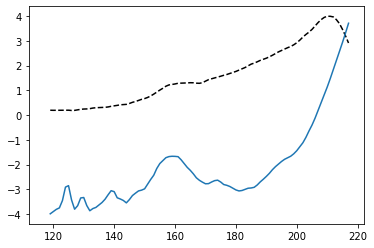

In [10]:
i = 2

plt.figure()
plt.plot((h3p_int[i]/np.nanmax(h3p_int[i]))*(np.nanmax(h3p_vprf[i])), 'k--')
plt.plot(h3p_vprf[i]*-1)

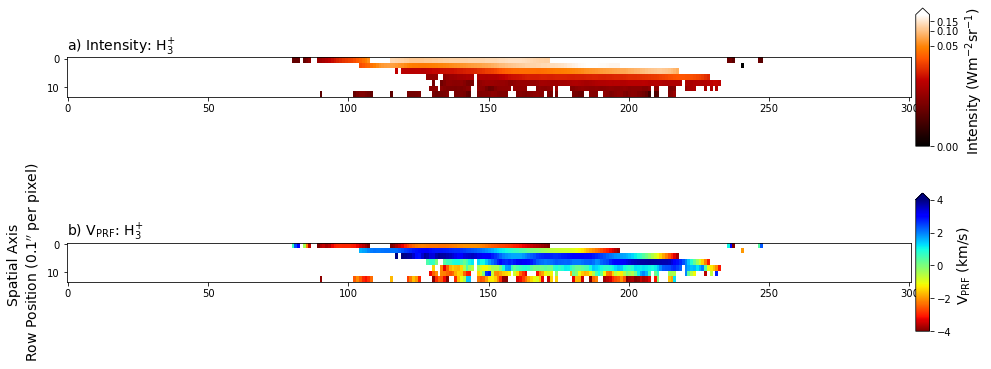

In [24]:
h3p_int_rs = np.array(Image.fromarray(h3p_int).resize(size=(301, 14), resample=0))
h3p_vprf_rs = np.array(Image.fromarray(h3p_vprf).resize(size=(301, 14), resample=0))

fig = plt.figure(figsize=(15,8), tight_layout=True, facecolor='white')

fig.add_subplot(311)
plt.imshow(h3p_int_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='gist_heat',
#            extent=[-150, 150, 146.0669, 189.0669], 
           norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.title('a) Intensity: H$_3^{+}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=10, pad=0.005, shrink=0.75).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=14)

fig.add_subplot(312)
plt.imshow(h3p_vprf_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r', 
#            extent=[-150, 150, 146.0669, 189.0669], 
           vmin=-4, 
           vmax=4)
# plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=16)
plt.title('b) V$_{\mathrm{PRF}}$: H$_3^{+}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=10, pad=0.005, shrink=0.75).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)